## Training a KNN model to diagnostic breast cancer

In [1]:
#Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Setting style
sns.set_palette("Dark2_r")
sns.set_style("darkgrid")

#### Reading data

In [3]:
df = pd.read_csv('../data/breast cancer data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

#### As we can see above, there is no missing values. Only a mysterious column with no name and no data

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


#### The dataset has 32 columns, with 1 column referring to the patient ID and a last column with only null values

In [5]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

## Exploratory analysis

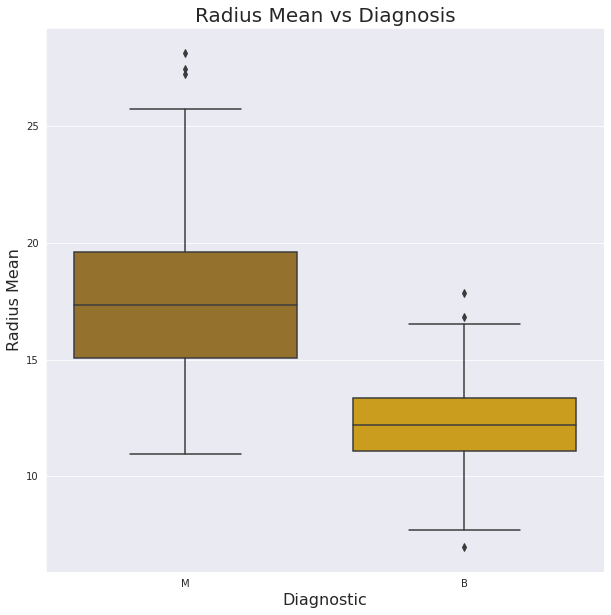

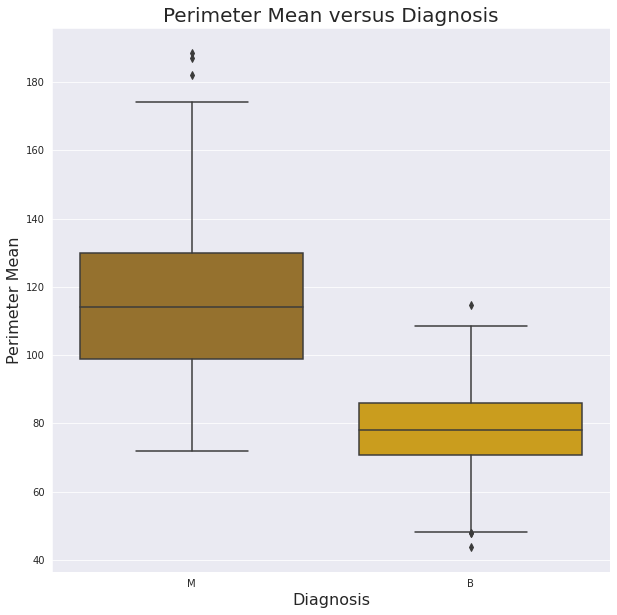

In [6]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data = df, x='diagnosis', y='radius_mean')
ax.set_title('Radius Mean vs Diagnosis', fontsize=20)
ax.set_xlabel('Diagnostic', fontsize=16)
ax.set_ylabel('Radius Mean', fontsize=16)
plt.show()

plt.figure(figsize=(10,10))
ax = sns.boxplot(data = df, x='diagnosis', y='perimeter_mean')
ax.set_title('Perimeter Mean versus Diagnosis', fontsize=20)
ax.set_xlabel('Diagnosis', fontsize=16)
ax.set_ylabel('Perimeter Mean', fontsize=16)
plt.show()

#### We can see here that information such as the average perimeter and the average radius of a tumor can be quite discriminatory during diagnosis

#### Checking how balanced the target are

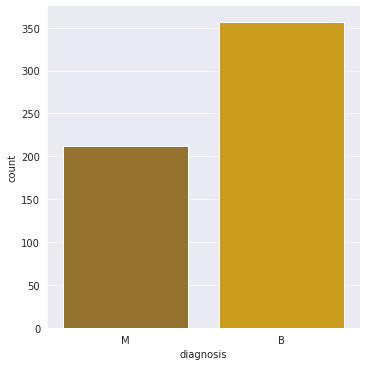

In [7]:
ax = sns.catplot(x = 'diagnosis', data=df, kind='count')
ax;

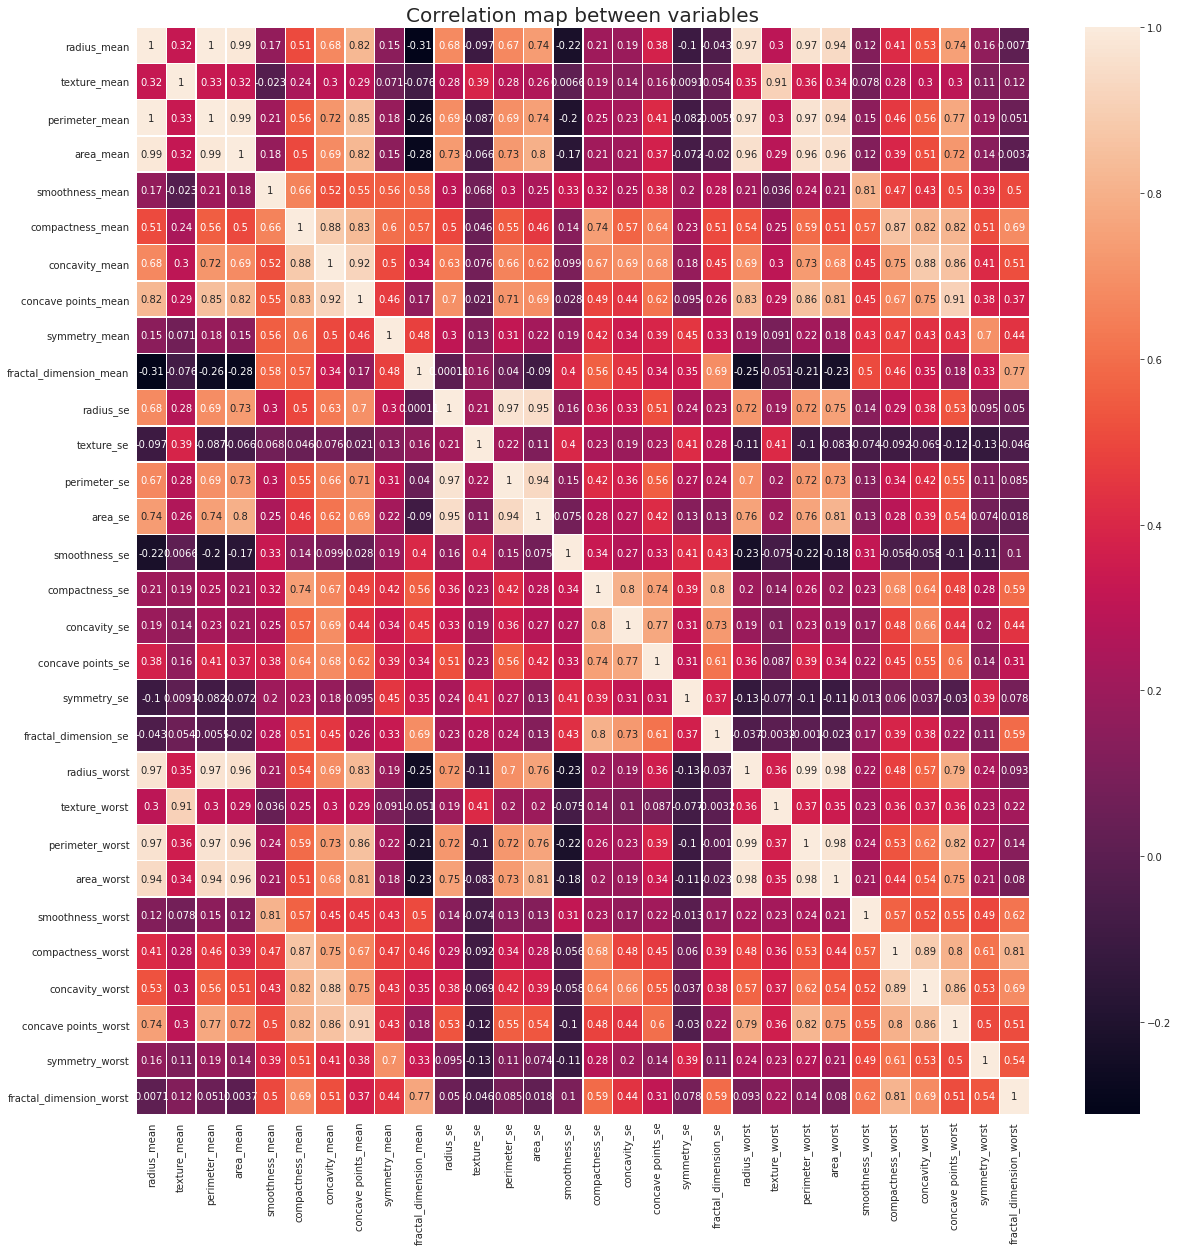

In [8]:
plt.figure(figsize=(20,20))
ax = sns.heatmap(df.corr(), annot=True, linewidths=.5)
ax.set_title('Correlation map between variables', fontsize = 20)
ax;

## Variance

In [9]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
 
Var = VarianceThreshold()
Var.fit(df.apply(LabelEncoder().fit_transform))
 
pd.DataFrame(data = Var.variances_.round(2), index=df.columns, columns=['Variance'])

,Variance
diagnosis,0.23
radius_mean,455.00
texture_mean,478.00
perimeter_mean,521.00
area_mean,538.00
smoothness_mean,473.00
compactness_mean,536.00
concavity_mean,536.00
concave points_mean,541.00
symmetry_mean,431.00


## Training

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

X = df.drop(columns=['diagnosis'])
y = LabelEncoder().fit_transform(df['diagnosis'])

#Split in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

#Applying a scaler
scaler = StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Creating the model
model = KNeighborsClassifier()
#Training the model
model.fit(X_scaled, y_train)

KNeighborsClassifier()

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       107
           1       0.97      0.91      0.94        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

[[105   2]
 [  6  58]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.98       250
           1       0.99      0.94      0.97       148

    accuracy                           0.97       398
   macro avg       0.98      0.97      0.97       398
weighted avg       0.98      0.97      0.97       398



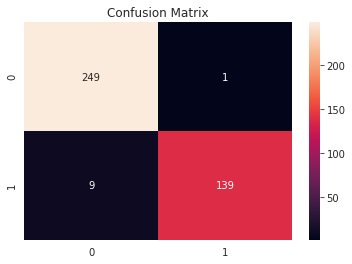

In [23]:
pred = model.predict(X_scaled)
print(classification_report(y_train, pred))
sns.heatmap(confusion_matrix(y_train, pred), annot=True, fmt='d')
plt.title('Confusion Matrix - Training set')
plt.show()

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       107
           1       0.97      0.91      0.94        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



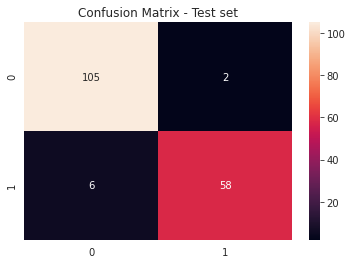

In [25]:
pred = model.predict(X_test_scaled)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d')
plt.title('Confusion Matrix - Test set')
plt.show()